# EcoVision – YOLOv10 Trash Detection
**CS366 Computer Vision Final Project**

Sean Bell | Colby College | Fall 2025

In [2]:
# GPU Check
!nvidia-smi

Sat Dec  6 21:52:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Install Dependencies
!pip install ultralytics roboflow supervision --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 kB 25.5 MB/s eta 0:00:00


In [4]:
# Imports
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image, display
import supervision as sv
import glob
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [1]:
# Download TACO Dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SfJRuGSf57ioCOp9x7Vz")
project = rf.workspace("seanbell").project("taco-7cvyg-evncy")
version = project.version(1)
dataset = version.download("yolov8")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 94.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to taco-1 in yolov8:: 100%|██████████| 12840/12840 [00:02<00:00, 6097.93it/s]


In [5]:
# Get Data Path
DATA_YAML = f"{dataset.location}/data.yaml"
print(DATA_YAML)

/content/taco-1/data.yaml


In [6]:
# Load YOLOv10
model = YOLO("yolov10n.pt")

In [7]:
# Train Model
results = model.train(
    data=DATA_YAML,
    epochs=50,
    imgsz=640,
    batch=16,
    patience=10,
    project="ecovision",
    name="train",
    exist_ok=True,
    plots=True
)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/taco-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0,

In [8]:
# Get Best Weights Path
BEST_PT = glob.glob("/content/ecovision/**/best.pt", recursive=True)[0]
EXP_DIR = os.path.dirname(os.path.dirname(BEST_PT))
print("Weights:", BEST_PT)

Weights: /content/ecovision/train/weights/best.pt


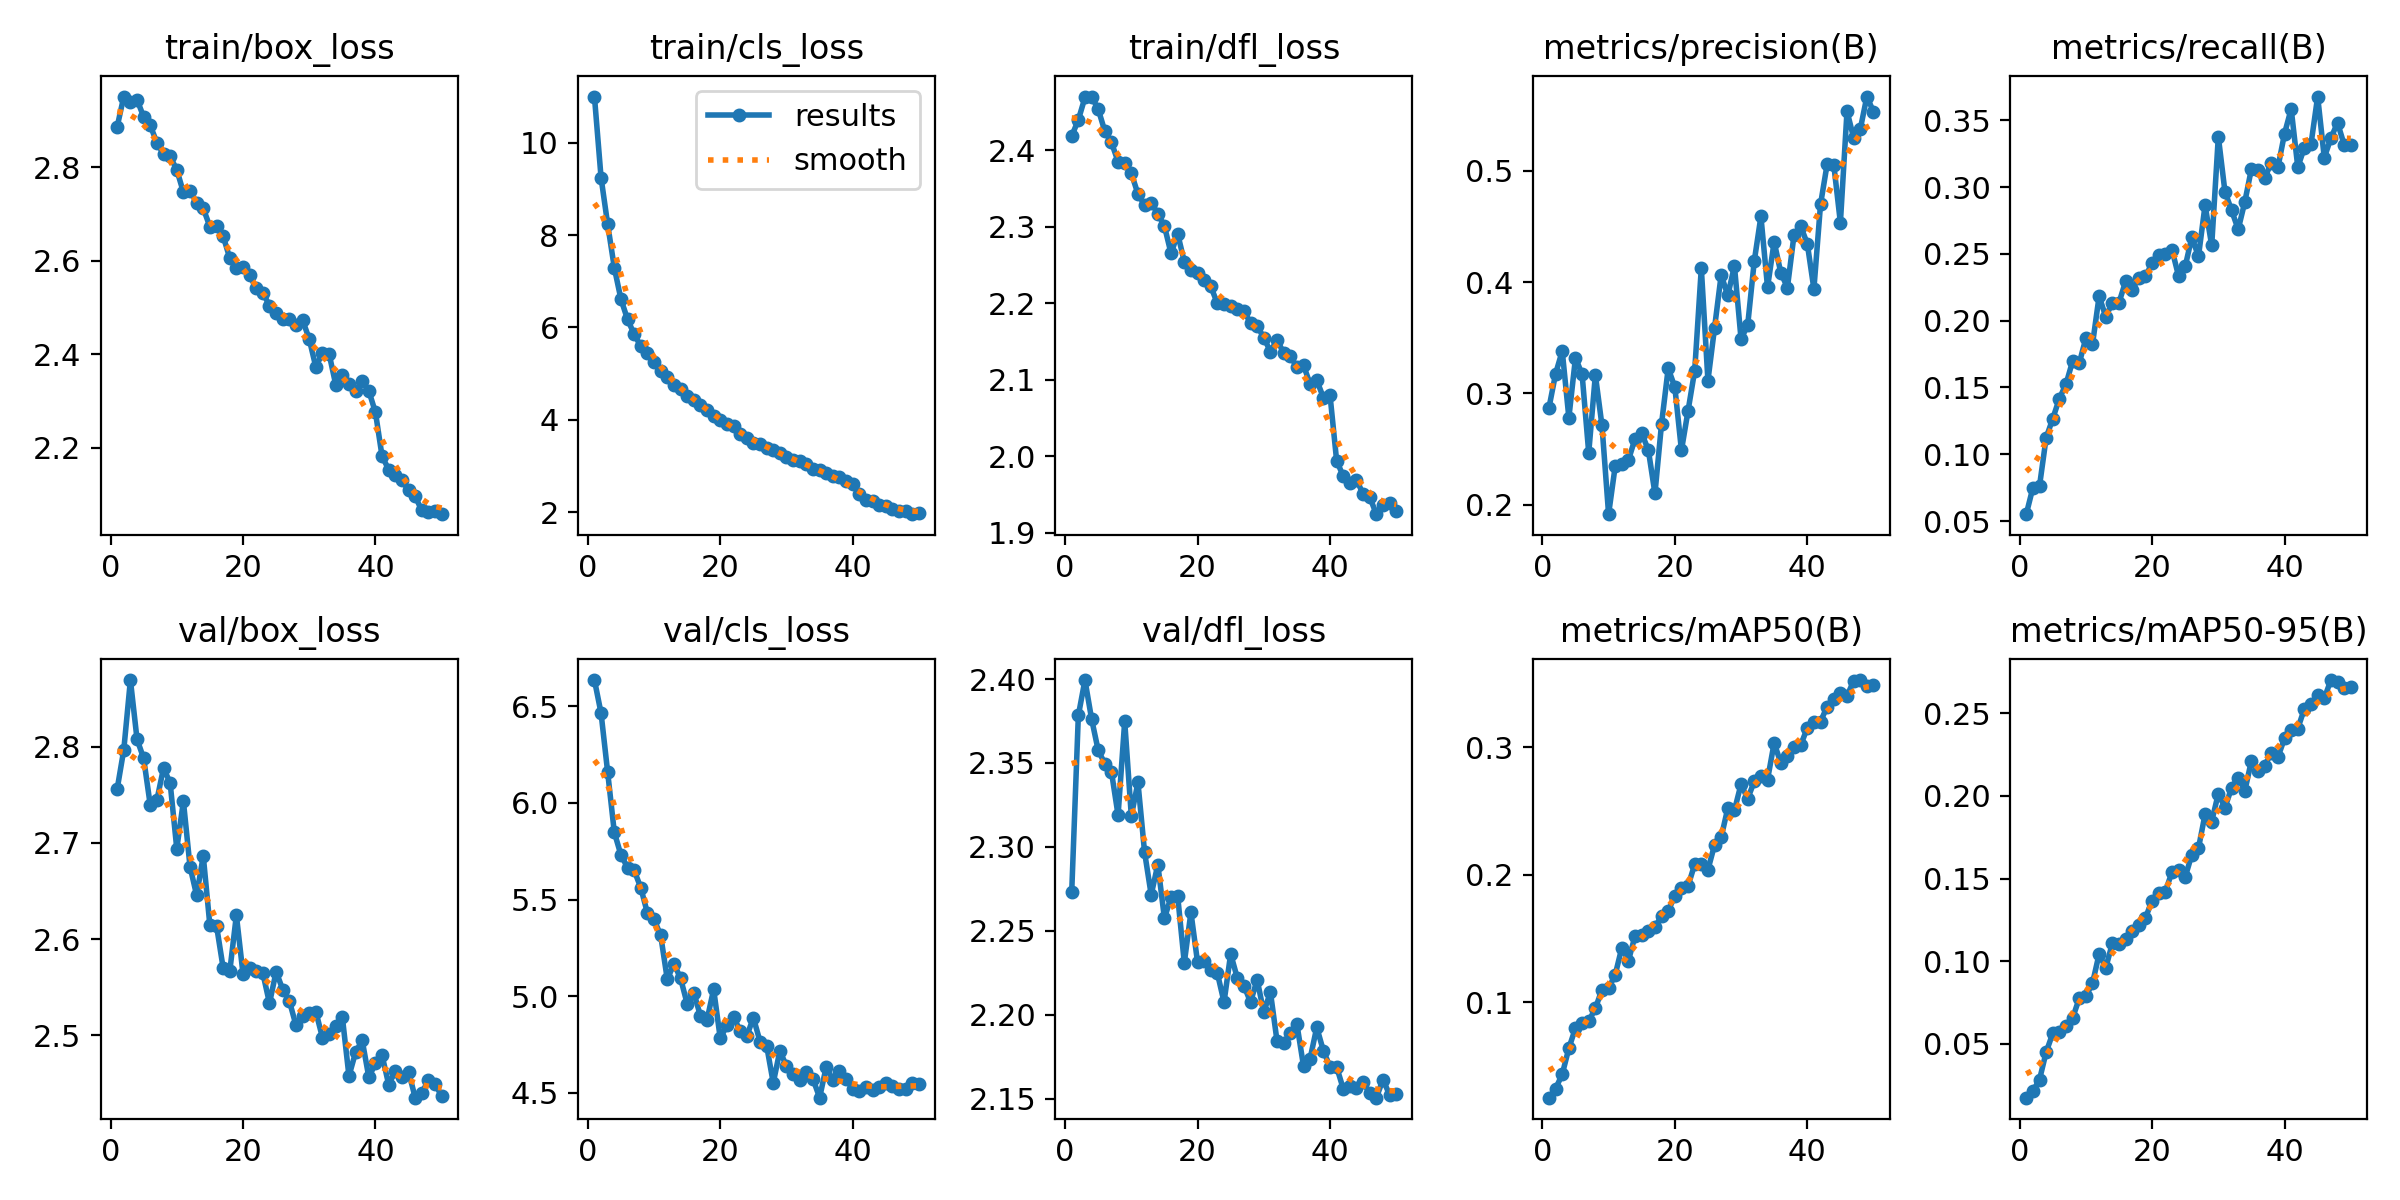

In [9]:
# Training Results
display(Image(filename=f"{EXP_DIR}/results.png", width=600))

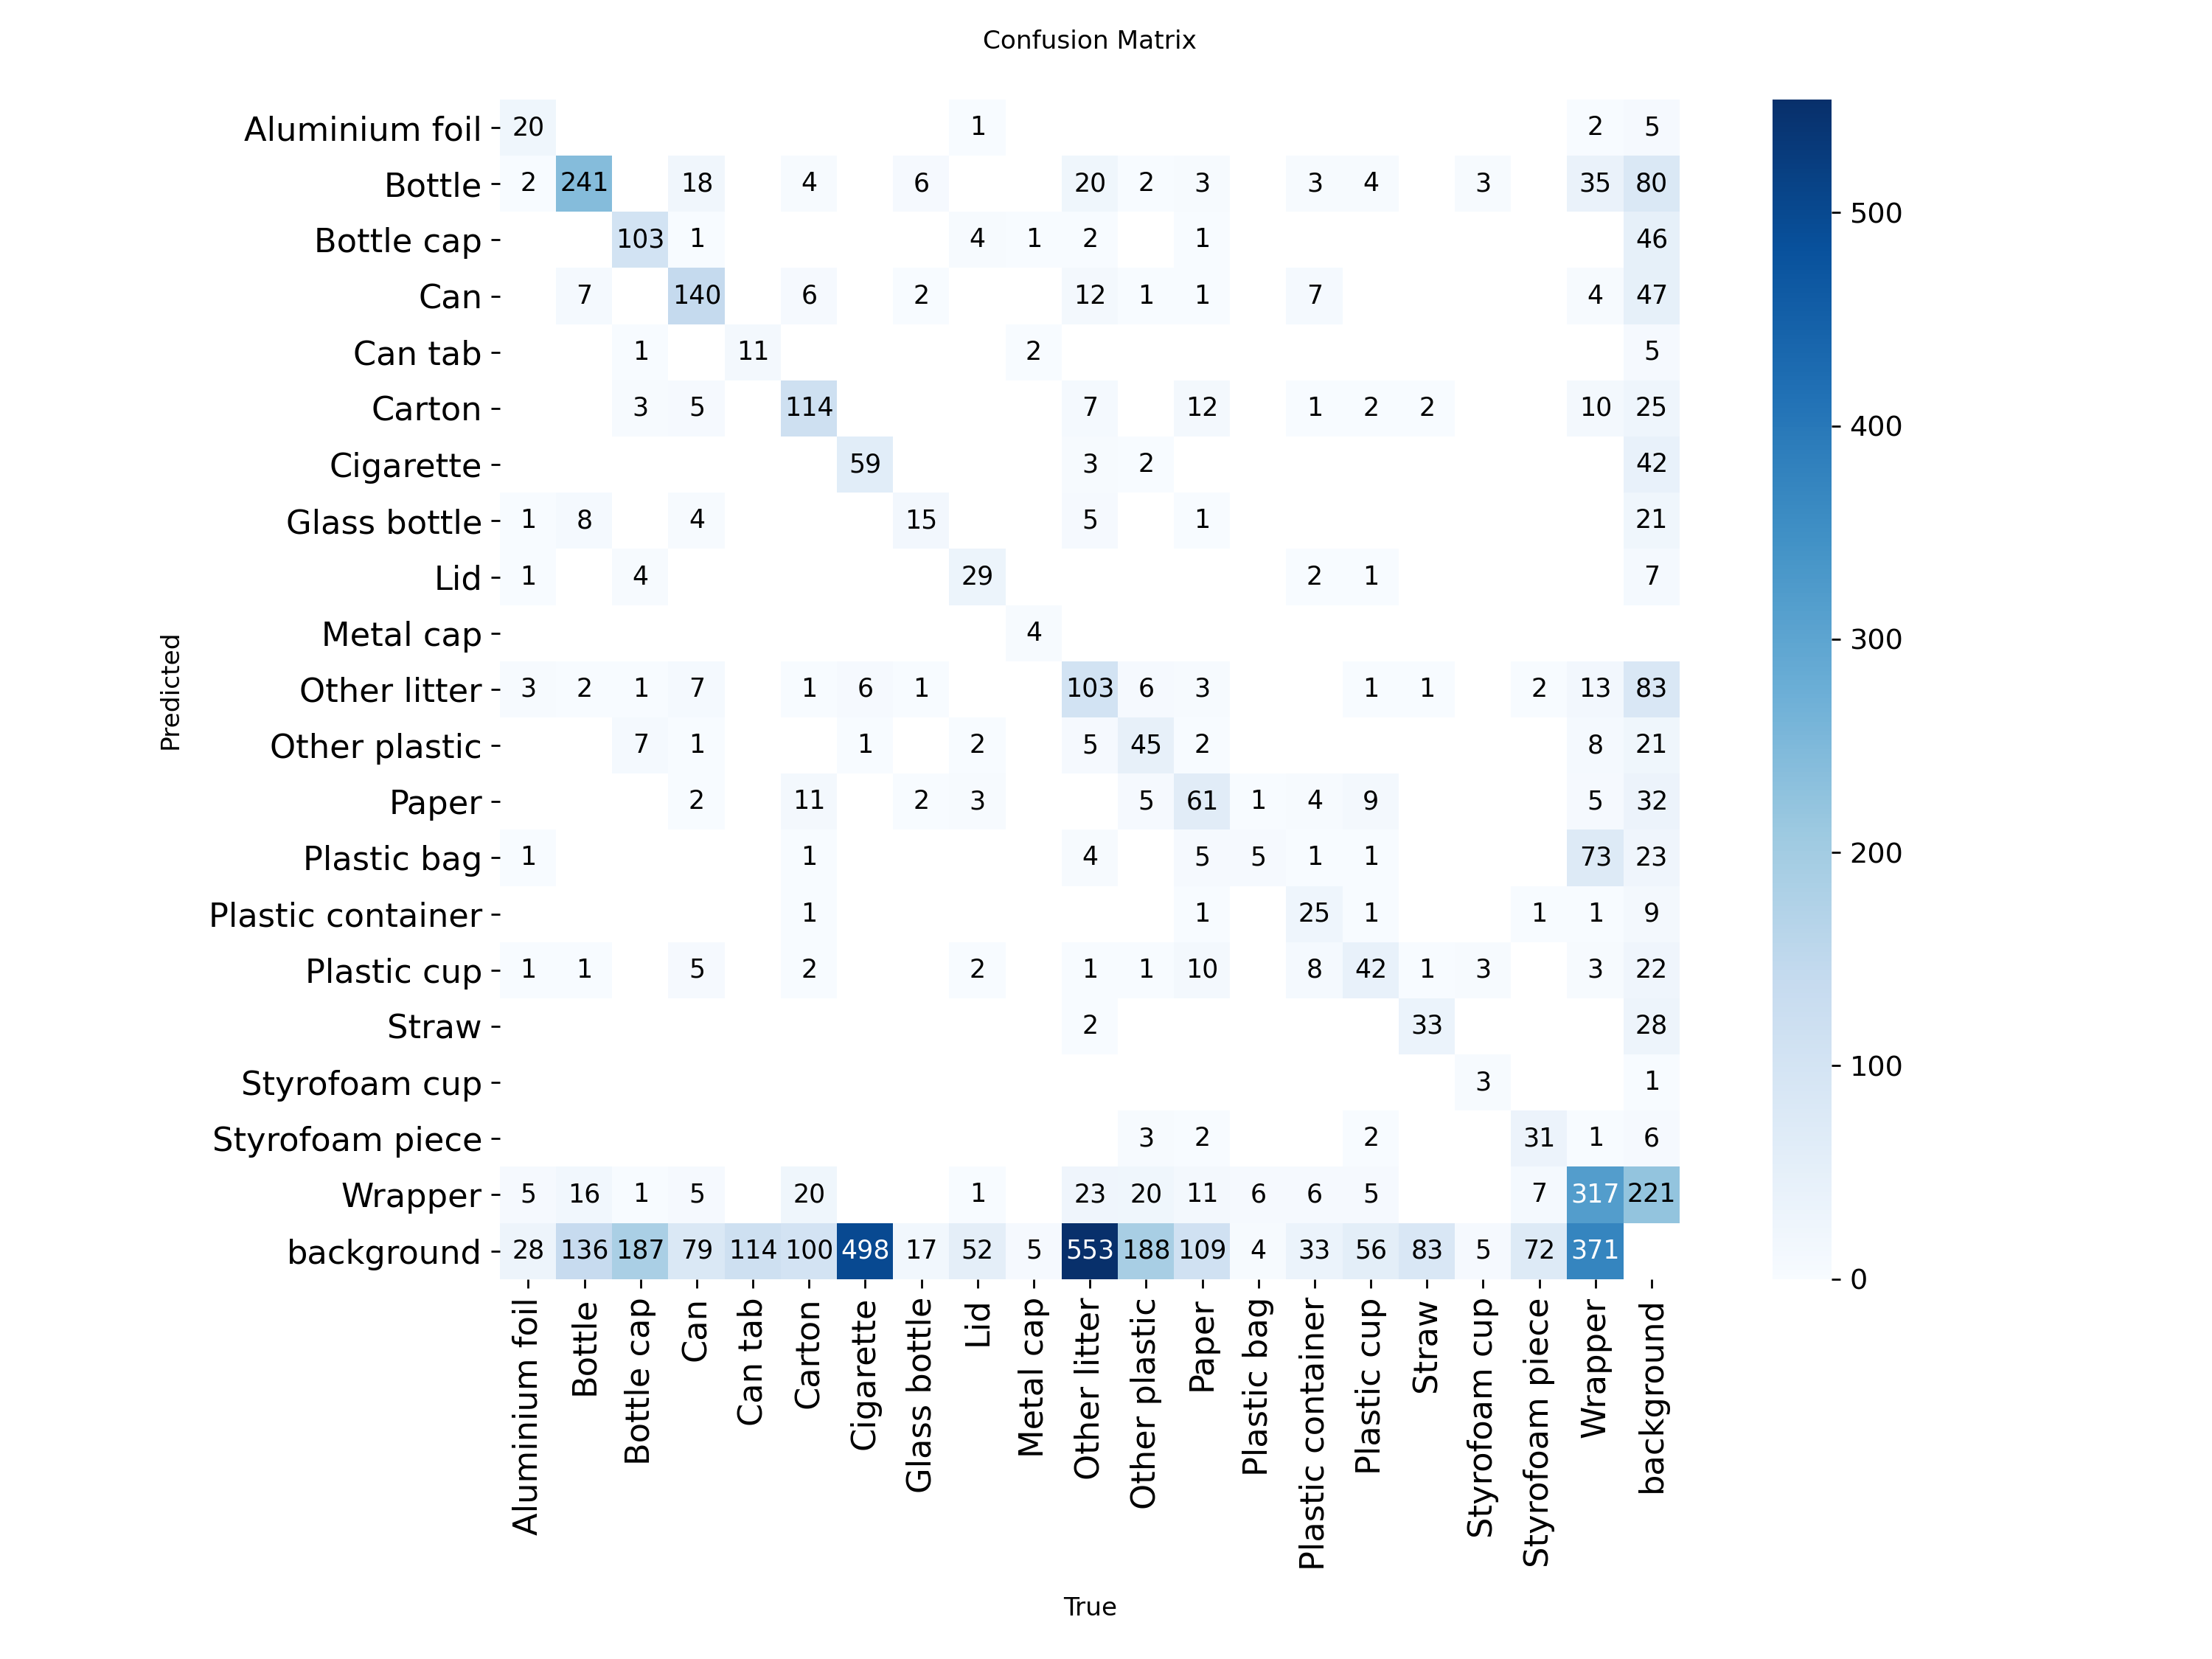

In [10]:
# Confusion Matrix
display(Image(filename=f"{EXP_DIR}/confusion_matrix.png", width=600))

In [11]:
# Load Trained Model
model = YOLO(BEST_PT)

In [12]:
# Validate
metrics = model.val(data=DATA_YAML)
print("mAP50:", metrics.box.map50)
print("mAP50-95:", metrics.box.map)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 102 layers, 2,269,068 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2049.1±809.3 MB/s, size: 81.6 KB)
val: Scanning /content/taco-1/valid/labels.cache... 1704 images, 4 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1704/1704 3.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 107/107 6.5it/s 16.5s
                   all       1704       4700       0.53      0.337      0.352      0.269
        Aluminium foil         48         62      0.692      0.355      0.399      0.317
                Bottle        313        411       0.55      0.618      0.611      0.472
            Bottle cap        266        307      0.631      0.368      0.404      0.267
                   Can        187        267      0.624      0.579      0.597      0.479
               Can tab         87        


image 1/1 /content/taco-1/valid/images/000101_JPG_jpg.rf.f3d71743a505774a542c58e4f8e31a1a.jpg: 640x640 1 Plastic bag, 13.1ms
Speed: 1.7ms preprocess, 13.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


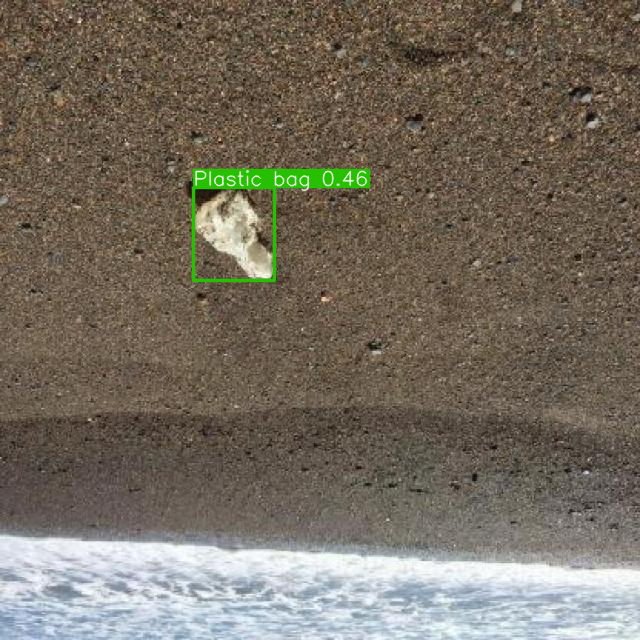

In [14]:
# Test Inference
import random

valid_images = glob.glob(f"{dataset.location}/valid/images/*.jpg")
test_img = random.choice(valid_images)

results = model(test_img, conf=0.25)[0]
results.show()

In [15]:
# Download Weights
from google.colab import files
files.download(BEST_PT)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>